In [1]:
import pandas as pd
data = pd.read_csv("case_daily_trends__united_states.csv", comment="#")
data = data[::-1].reset_index(drop=True)
data.iloc[:,1:3] /= 1e4
from scipy.signal import find_peaks

## Covid predictions
The US caseload of covid infections has seen two spikes which dissipated (although never actually reaching their old minimum values).  We are currently in a third one.  How quickly will it last?  Well, both previous spikes had quite strong linear regimes.  Therefore, we can get a first-order approximation by doing linear fits and asking:  If the current new caseloads ceased *today*, how long would it take us to get back to the *previous peak*?

### Data cleanup
The original data is quite wiggly, but we only care about low-order information

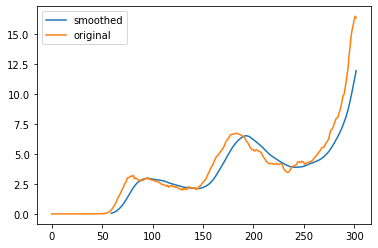

In [2]:
# data cleanup: remove the leading zeros in the data, and then
# smooth it to get rid of high-frequency noise.
smooth_data = data[40:].rolling(window=20).mean()

# as you can see, the smoothing is not removing any information
# that we care about.  Importantly, the wavelengths between peaks
# and troughs of the infection spikes are preserved.
plt.plot(smooth_data['7dayavg'], label='smoothed')
plt.plot(data['7dayavg'], label='original')
plt.legend()

### Get the negative slopes
So there were two decreases: one in the spring, and one in the summer, which was more aggressive.

Text(0, 0.5, 'new cases (x 10^4)')

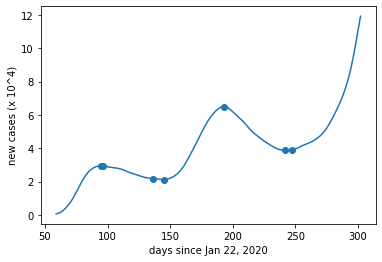

In [3]:
# identify the peaks and troughs
eps = .005
ddata = smooth_data['7dayavg'].diff()
flat_spots = ddata[np.abs(ddata) < eps]
plt.plot(smooth_data['7dayavg'])
plt.scatter(flat_spots.index, smooth_data['7dayavg'][flat_spots.index])
plt.xlabel('days since Jan 22, 2020')
plt.ylabel(r'new cases (x 10^4)')

Text(0, 0.5, 'new cases (x 10^4)')

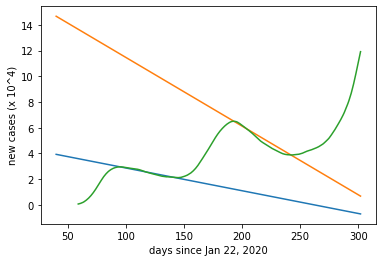

In [4]:
# so there are four groups of points, I'll combine them into
# data for two different linear fits:
x1 = [95, 141]
x2 = [193, 242]
y1 = smooth_data['7dayavg'][x1]
y2 = smooth_data['7dayavg'][x2]
fit1 = np.polyfit(x1, y1, 1)
fit2 = np.polyfit(x2, y2, 1)
linedata = np.arange(smooth_data.index.min(),smooth_data.index.max(),0.01)
line1 = linedata * fit1[0] + fit1[1]
line2 = linedata * fit2[0] + fit2[1]
plt.plot(linedata, line1)
plt.plot(linedata, line2)
plt.plot(smooth_data['7dayavg'])
plt.xlabel('days since Jan 22, 2020')
plt.ylabel(r'new cases (x 10^4)')

In [5]:
# so there are two slopes:
print(fit1[0])
print(fit2[0])
print(f"average: {np.mean([fit1[0], fit2[0]])}")

-0.017700760869565225
-0.05344408163265308
average: -0.035572421251109154


In [6]:
def when_given_slope(m,
                     y1 = smooth_data['7dayavg'].max(),
                     y2 = smooth_data['7dayavg'][x2[0]],
                     x1 = smooth_data['7dayavg'].index.max()):
    return((y2 - y1)/m + x1)

## Linear fits and predictions
So, let's look at the pessimistic case (the cases decline like they did in the spring), and the optimistic one (they decline like they did in the summer).

In [7]:
# If they decline like they did in the spring,
when_given_slope(fit1[0])

608.1718668443384

608 days after January 22, 2020 is **September 21, 2021**

In [8]:
# If they decline like they did in the summer,
when_given_slope(fit2[0])

403.40458652186527

403 days after January 22, 2020 is **February 28, 2021**

In either case, it just doesn't make sense to give the qual at the end of January.  We are almost certainly not at the end of the current spike in cases, with Thanksgiving and Christmas almost certain to cause new explosions.  Furthermore, with a vaccine so close, we have more incentive than ever before to keep ourselves at home and safe.  What reason is there not to simply do it around May, when it is likely we will all have gotten vaccinated?